In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pingouin as pg
import scipy

In [2]:
from scipy.stats import skewnorm
np.random.seed(seed=1)
size=200

X1 = np.random.normal(loc=40, scale=2, size=int(size/2) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/2) ) 
bi_modal = np.concatenate([X1, X2])

X1 = np.random.normal(loc=40, scale=4, size=int(size/4) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/4) ) 
X3 = np.random.normal(loc=0, scale=2, size=int(size/4) ) 
X4 = np.random.normal(loc=80, scale=2, size=int(size/4) ) 
multi_modal = np.concatenate([X1, X2, X3, X4])


df = pd.DataFrame(data={'Normal':np.random.normal(loc=0, scale=2, size=size),
                        "Positive Skewed": skewnorm.rvs(a=10, size=size),
                        "Negative Skewed": skewnorm.rvs(a=-10, size=size),
                        "Exponential":np.random.exponential(scale=20,size=size),
                        "Uniform":np.random.uniform(low=0.0, high=1.0, size=size),
                        "Bimodal":  bi_modal,
                        "Multimodal":  multi_modal,
                        "Poisson":np.random.poisson(lam=1.0, size=size),
                        "Discrete": np.random.choice([10,12,14,15,16,17,20],size=size),
                        }).round(3)

df.head(3)

,Normal,Positive Skewed,Negative Skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,-2.613,0.987,-0.099,36.250,0.864,43.249,38.396,0,20
1,0.153,0.570,-2.485,16.062,0.448,38.776,43.296,1,17
2,0.734,1.093,-0.487,40.443,0.562,38.944,37.751,1,17


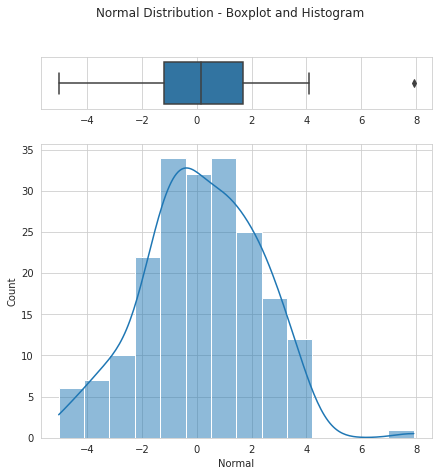

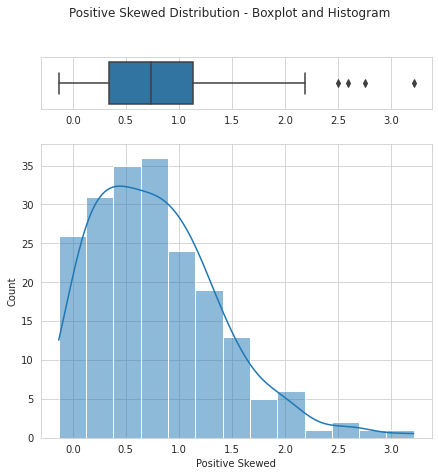

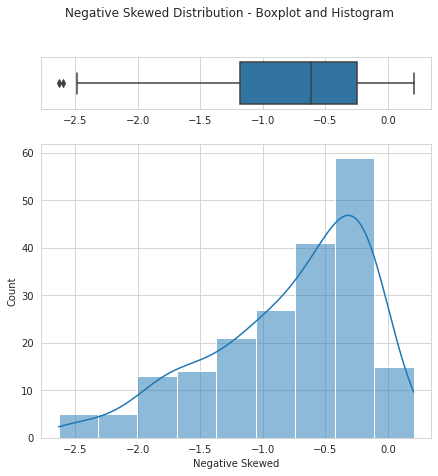

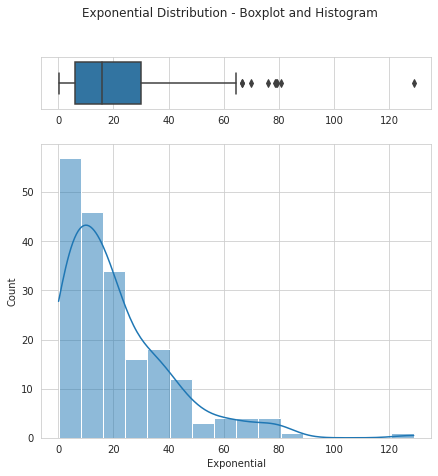

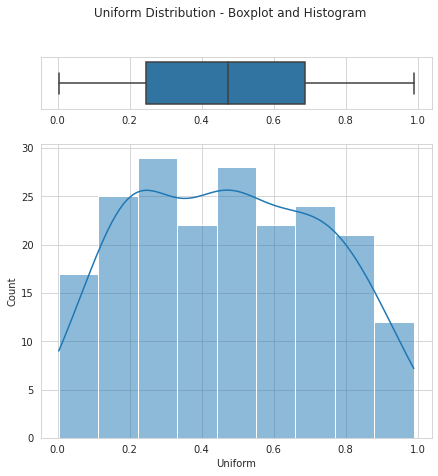

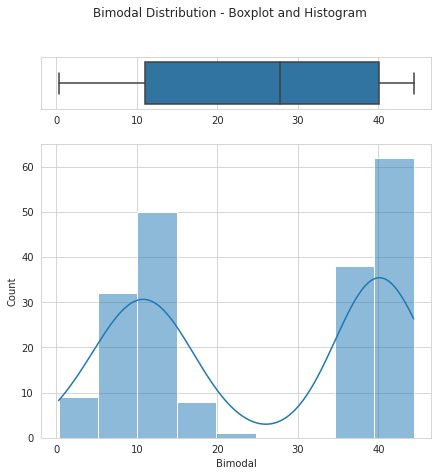

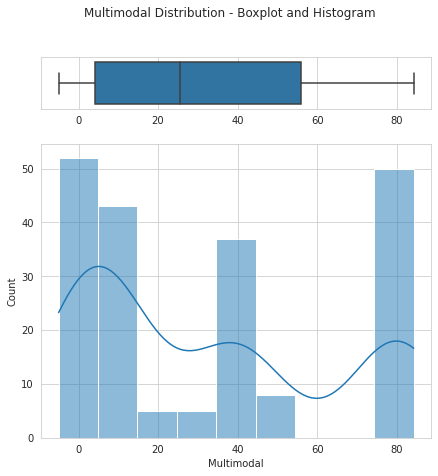

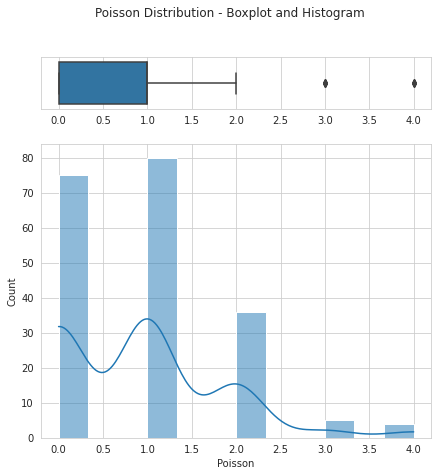

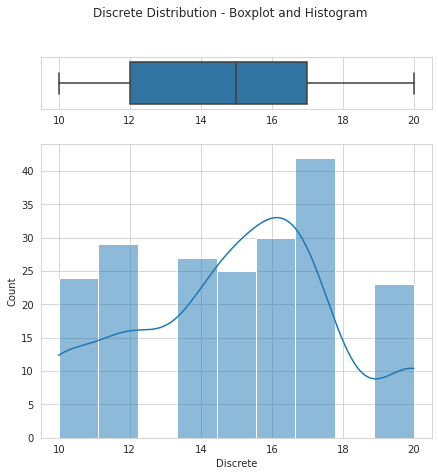

In [3]:
for col in df.columns:
  fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
  sns.boxplot(data=df, x=col, ax=axes[0])
  axes[0].set_xlabel(" ")
  sns.histplot(data=df, x=col, kde=True, ax=axes[1])
  fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
  plt.show()
  print("\n\n")

In [4]:
pg.normality(data=df, alpha=0.05)


,W,pval,normal
Normal,0.988676,1.138130e-01,True
Positive Skewed,0.942788,4.038357e-07,False
Negative Skewed,0.918364,4.423824e-09,False
Exponential,0.838932,1.286760e-13,False
Uniform,0.968244,1.724644e-04,False
Bimodal,0.790213,1.158737e-15,False
Multimodal,0.843654,2.137681e-13,False
Poisson,0.817142,1.403118e-14,False
Discrete,0.931507,4.456996e-08,False


In [5]:
df_pinguins = sns.load_dataset('penguins')
print(df_pinguins.shape)
df_pinguins.head(3)

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [6]:
pg.normality(data=df_pinguins, dv='bill_length_mm', group='species', alpha=0.05)

,W,pval,normal
Adelie,0.993362,0.716614,True
Chinstrap,0.975250,0.194095,True
Gentoo,0.972722,0.013490,False


In [7]:
pg.normality(data=df_pinguins['bill_length_mm'], alpha=0.05)

,W,pval,normal
bill_length_mm,0.974855,0.000011,False


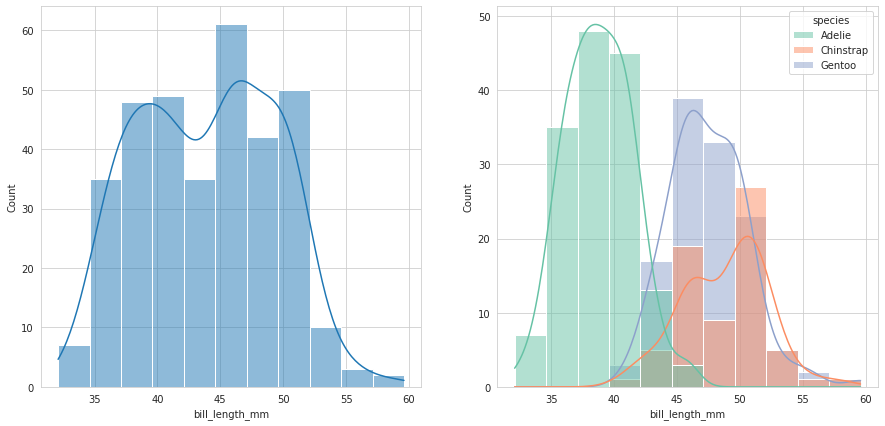

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
sns.histplot(data=df_pinguins, x='bill_length_mm', kde=True, ax=axes[0])
sns.histplot(data=df_pinguins, x='bill_length_mm',hue='species' , kde=True, palette='Set2', ax=axes[1])
plt.show();
print("\n\n")

In [9]:
df = pg.read_dataset('chi2_independence')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

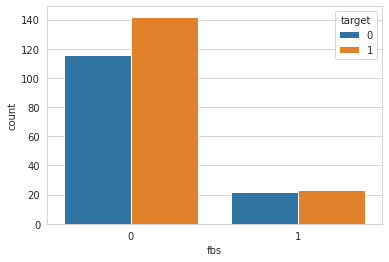

In [11]:
sns.countplot(x='fbs',hue='target',data=df)
plt.show()

In [12]:
expected, observed, stats = pg.chi2_independence(data=df, x='fbs', y='target')

In [13]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.106273,1.0,0.744428,0.018728,0.062261
1,cressie-read,0.666667,0.106201,1.0,0.744511,0.018722,0.062253
2,log-likelihood,0.000000,0.106069,1.0,0.744664,0.018710,0.062237
3,freeman-tukey,-0.500000,0.105979,1.0,0.744769,0.018702,0.062227
4,mod-log-likelihood,-1.000000,0.105897,1.0,0.744865,0.018695,0.062217
5,neyman,-2.000000,0.105755,1.0,0.745030,0.018682,0.062201


In [14]:
stats.query("test == 'pearson'")['pval']

0    0.744428
Name: pval, dtype: float64

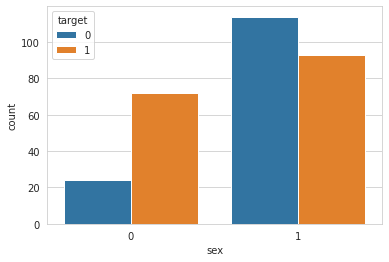

In [15]:
sns.countplot(data=df, x='sex', hue='target')
plt.show()

In [16]:
expected, observed, stats = pg.chi2_independence(data=df, x='sex', y='target')

In [17]:
stats.query("test == 'pearson'")['pval']

0    0.000002
Name: pval, dtype: float64